## Bilgisayar Ödevi - PGM Okuma ve Yazma Fonksiyonları

### SENANUR AĞAÇ - 200102002043

## 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
def mypgmwrite(filename, image, height, width):
    with open(filename, 'wb') as f:
        # PGM dosyasının başlık bilgilerini yaz
        f.write(b'P5\n')
        f.write(f'{width} {height}\n'.encode())
        f.write(b'255\n')

        for row in range(height):
            for col in range(width):
                pixel_value = image[row, col]
                f.write(bytes([pixel_value]))  # Piksel değeri binary olarak yazıldı

# 3x3 piksel boyutunda bir görüntü oluşturuldu
image = np.array([[101, 102, 103],
                  [104, 105, 106],
                  [107, 108, 109]], dtype=np.uint8)

# Görüntü PGM dosyasına yazıldı
mypgmwrite('test.pgm', image, 3, 3)


## 2)

In [3]:
import numpy as np

def mypgmread(filename):
    with open(filename, 'rb') as f:
        header = []
        # PGM dosyasının başlık bilgileri okundu
        while True:
            line = f.readline().decode('ascii').strip()
            if not line or line.startswith('#'):
                continue
            header.append(line)
            if len(header) == 3:
                break

        if len(header) < 3:
            print("Geçersiz PGM dosya formatı.")
            return None

        # Genişlik, yükseklik ve maksimum değer başlık bilgilerinden alındı
        width, height = map(int, header[1].split())
        maxval = int(header[2])

        # Veriyi okundu
        pixel_values = np.fromfile(f, dtype=np.uint8, count=width * height)

        # Veriyi boyutlarına uygun şekilde yeniden şekillendildi
        pixel_values = pixel_values.reshape((height, width))

        return pixel_values, width, height, maxval

# "test.pgm" dosyası okundu ve veri pixel_values değişkenine atandı
pixel_values, width, height, maxval = mypgmread('test.pgm')

# Her pikselin değeri ekrana yazdıldı
for i in range(height):
    for j in range(width):
        print(pixel_values[i][j], end=' ')
    print()


101 102 103 
104 105 106 
107 108 109 


## 3)

[[ 10  13  16 ... 151 154 157]
 [ 10  13  16 ... 151 154 157]
 [ 10  13  16 ... 151 154 157]
 ...
 [ 10  13  16 ... 151 154 157]
 [ 10  13  16 ... 151 154 157]
 [ 10  13  16 ... 151 154 157]]


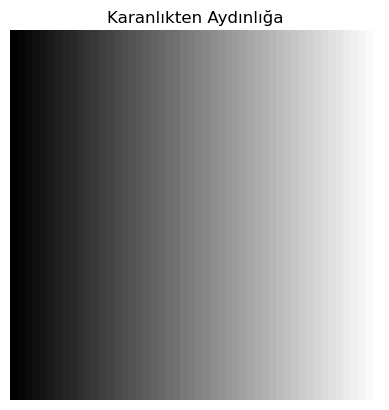

In [4]:
import numpy as np

# 50x50 boyutunda bir görüntü oluşturuldu
image = np.zeros((50, 50), dtype=np.uint8)

# Her sütunun değerlerini 10'dan başlayarak 3'er artan bir şekilde dolduruldu
for col in range(50):
    image[:, col] = 10 + col * 3

# Görüntüyü PGM dosyasına yazıldı
mypgmwrite('karanliktanaydinliga.pgm', image, 50, 50)

# Sütun ve satır indeksleri ekrana yazdırıldı

print(image)
fig = plt.figure()

# Görüntü figürün içine yerleştirildi 
plt.imshow(image, cmap='gray')
plt.axis('off')
# Figür başlığını ayarla
plt.title('Karanlıkten Aydınlığa')
plt.show()

## 4)

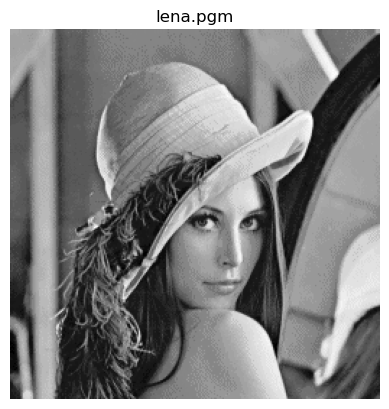

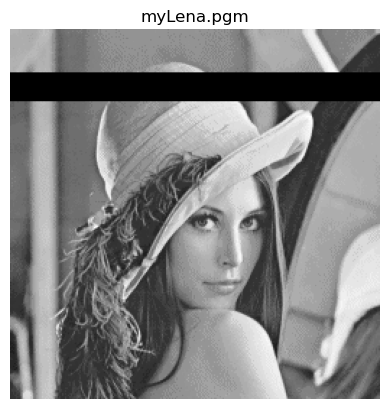

In [5]:

# "lena.pgm" dosyasını oku
lena_image, width, height, maxval = mypgmread('lena.pgm')
plt.imshow(lena_image, cmap='gray')
plt.title('lena.pgm')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()
# 30-50 arası satırları siyah yapıldı
start_row = 30
end_row = 50
lena_image[start_row:end_row, :] = 0  # İstenen sutünlar 0 olarak ayarlandı

# Yeni görüntü "myLena.pgm" olarak kaydedildi
mypgmwrite('myLena.pgm', lena_image, width, height)

# "myLena.pgm" dosyasını okundu ve ekrana bastırıldı
mylena_image = mpimg.imread('myLena.pgm')
plt.imshow(mylena_image, cmap='gray')
plt.title('myLena.pgm')
plt.axis('off')  # Eksenler kapatıldı
plt.show()

